In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [131]:
os.getcwd()

'/Users/Nafsika/Documents/OMDENA CHAPTERS/EDA'

## Loading files

In [318]:
df_prec_2010_2020 = pd.read_csv("../DATA/belgrade_precipitation_2010_2020.csv")
df_prec_1901_2021 = pd.read_csv("../DATA/climateknowledgeportal_worldbank_org_precipitation_1901-2021_serbia.csv")
df_prec_2000_2018 = pd.read_csv("../DATA/daily_precipitation_flood_occurence_SERBIA_2000_to_2018.csv")
water_level_2002_2016_Danube = pd.read_csv("../DATA/water_level_2002_2016_Danube.csv")
water_level_Belgrade = pd.read_csv("../DATA/hidmet_gov_rs_BELGRADE_2000_2022.csv")

## File exploration

In [319]:
df_prec_2010_2020

,Unnamed: 0,Date,Precipitation (mm)
0,0,2010-01-01,10.5
1,1,2010-01-02,17.4
2,2,2010-01-03,11.0
3,3,2010-01-04,0.0
4,4,2010-01-05,11.6
...,...,...,...
4013,4013,2020-12-27,0.0
4014,4014,2020-12-28,0.1
4015,4015,2020-12-29,2.2
4016,4016,2020-12-30,8.3


In [320]:
df_prec_2010_2020['Date']=pd.to_datetime(df_prec_2010_2020['Date'])

In [321]:
df_prec_2010_2020.drop(['Unnamed: 0'], axis=1, inplace=True)

In [322]:
df_prec_2010_2020

,Date,Precipitation (mm)
0,2010-01-01,10.5
1,2010-01-02,17.4
2,2010-01-03,11.0
3,2010-01-04,0.0
4,2010-01-05,11.6
...,...,...
4013,2020-12-27,0.0
4014,2020-12-28,0.1
4015,2020-12-29,2.2
4016,2020-12-30,8.3


In [323]:
df_prec_2010_2020['year'] = df_prec_2010_2020['Date'].dt.year
df_prec_2010_2020['month'] = df_prec_2010_2020['Date'].dt.month
df_prec_2010_2020['day'] = df_prec_2010_2020['Date'].dt.day
df_prec_2010_2020['MM-DD'] = df_prec_2010_2020['Date'].dt.strftime('%m-%d')

In [324]:
df_prec_2010_2020.iloc[1:20,:]

,Date,Precipitation (mm),year,month,day,MM-DD
1,2010-01-02,17.4,2010,1,2,01-02
2,2010-01-03,11.0,2010,1,3,01-03
3,2010-01-04,0.0,2010,1,4,01-04
4,2010-01-05,11.6,2010,1,5,01-05
5,2010-01-06,26.6,2010,1,6,01-06
6,2010-01-07,4.0,2010,1,7,01-07
7,2010-01-08,2.6,2010,1,8,01-08
8,2010-01-09,1.8,2010,1,9,01-09
9,2010-01-10,1.1,2010,1,10,01-10
10,2010-01-11,0.0,2010,1,11,01-11


In [112]:
df_prec_2010_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4018 non-null   datetime64[ns]
 1   Precipitation (mm)  4018 non-null   float64       
 2   year                4018 non-null   int64         
 3   day                 4018 non-null   int64         
 4   month               4018 non-null   int64         
 5   MM-DD               4018 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 188.5+ KB


In [140]:
df_prec_2010_2020.isnull().values.any()

False

In [141]:
df_prec_duplicated = df_prec_2010_2020[df_prec_2010_2020.duplicated()]
df_prec_duplicated

,Date,Precipitation (mm),year,month,day,MM-DD


### Five point check

In [146]:
df_prec_2010_2020.describe()

,Precipitation (mm),year,month,day
count,4018.000000,4018.000000,4018.000000,4018.000000
mean,2.751543,2015.000747,6.522648,15.730463
std,5.920144,3.162868,3.449210,8.801536
min,0.000000,2010.000000,1.000000,1.000000
25%,0.000000,2012.000000,4.000000,8.000000
50%,0.200000,2015.000000,7.000000,16.000000
75%,2.800000,2018.000000,10.000000,23.000000
max,94.000000,2020.000000,12.000000,31.000000


In [124]:
# pivot table
df = df_prec_2010_2020[df_prec_2010_2020["month"].isin([4,5,6,7])]
df = df_prec_2010_2020[df_prec_2010_2020["year"].isin([2013,2014,2015,2016,2017,2018,2019,2020])]

piv = pd.pivot_table(df, index=['MM-DD'],columns=['year'], values=['Precipitation (mm)'])
piv


Precipitation (mm)                                    
year                2013 2014 2015 2016 2017  2018 2019 2020
MM-DD                                                       
01-01                0.0  0.0  0.0  0.0  0.0   0.0  0.1  0.0
01-02                0.0  0.0  0.0  0.2  0.0  21.3  2.8  0.0
01-03                0.2  0.0  1.0  5.8  2.3   1.4  4.3  0.0
01-04                0.5  0.0  1.6  1.0  1.7   2.5  0.3  0.1
01-05               11.4  2.3  5.8  0.2  2.4   0.3  2.1  1.3
...                  ...  ...  ...  ...  ...   ...  ...  ...
12-27                0.1  0.0  0.0  0.1  0.0   0.0  0.5  0.0
12-28                0.0  2.6  1.0  2.8  3.9   0.1  2.5  0.1
12-29                0.0  3.1  0.7  0.1  0.1   0.1  3.1  2.2
12-30                0.1  0.2  0.3  0.0  0.0   2.2  0.0  8.3
12-31                0.0  0.0  0.0  0.0  0.2   5.2  0.0  7.5

[366 rows x 8 columns]

### Below is a plot of precipitations for the period spanning 2013 to 2020

#### It can be observed, but not easily, that the precipitation pattern differs with the year.
#### Further down, I selected two years at a time to point out that diference more clearly.



<AxesSubplot:xlabel='MM-DD'>

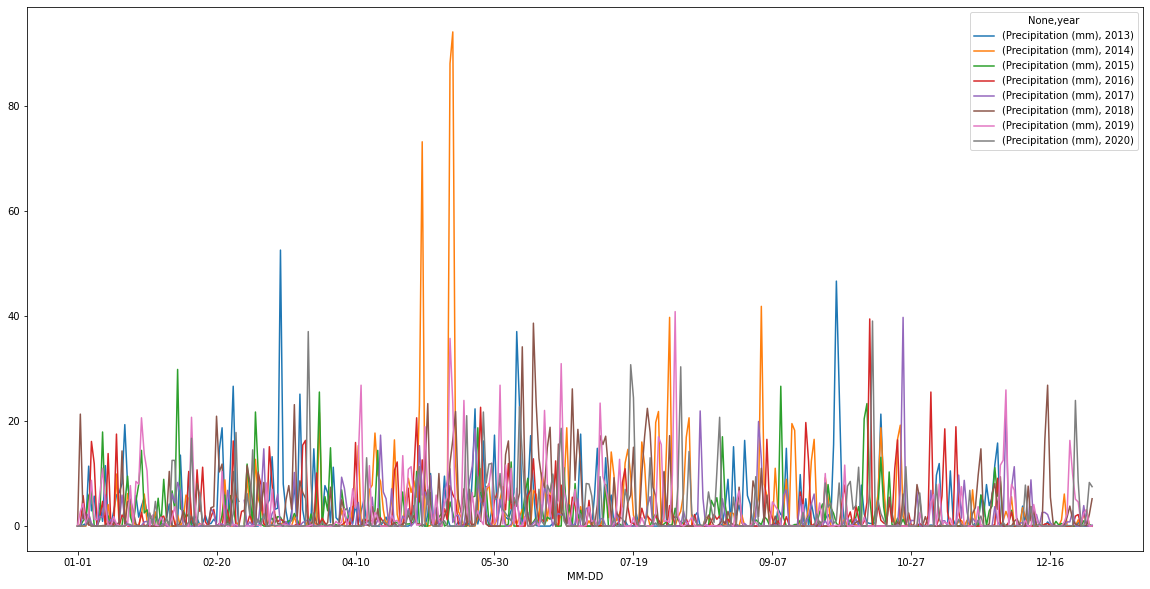

In [125]:
piv.plot(figsize=(20,10))

In [2]:
df = df_prec_2010_2020[df_prec_2010_2020["year"].isin([2010,2011])]
#df
piv = pd.pivot_table(df, index=['MM-DD'],columns=['year'], values=['Precipitation (mm)'])
#piv

<AxesSubplot:xlabel='MM-DD'>

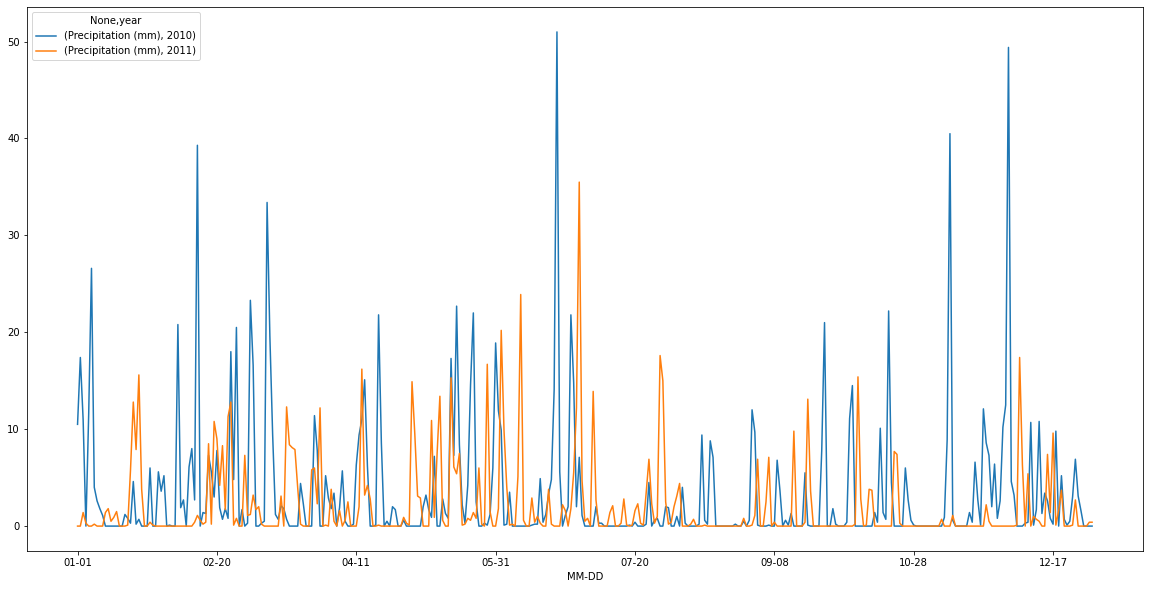

In [150]:
piv.plot(figsize=(20,10))

<AxesSubplot:xlabel='MM-DD'>

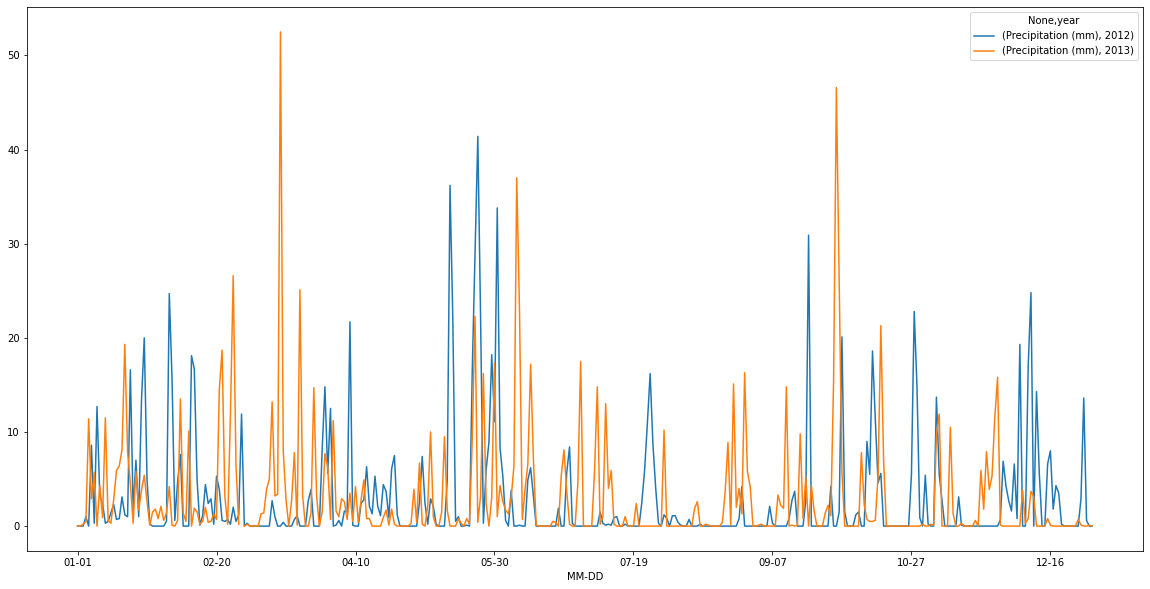

In [151]:
df = df_prec_2010_2020[df_prec_2010_2020["year"].isin([2012,2013])]
piv = pd.pivot_table(df, index=['MM-DD'],columns=['year'], values=['Precipitation (mm)'])
piv.plot(figsize=(20,10))

<AxesSubplot:xlabel='MM-DD'>

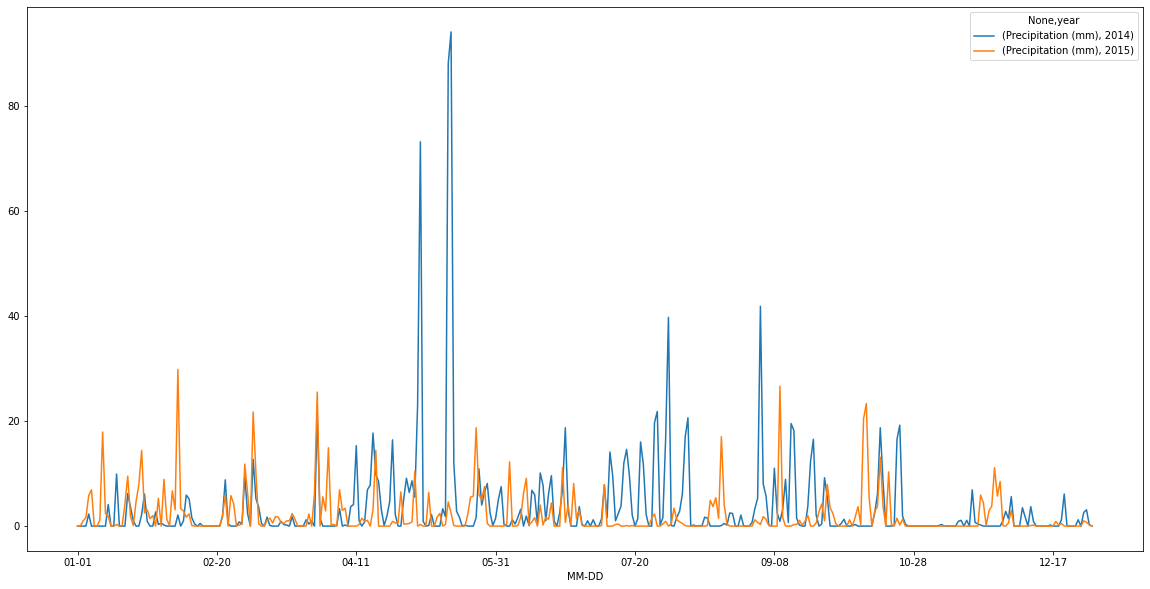

In [152]:
df = df_prec_2010_2020[df_prec_2010_2020["year"].isin([2014,2015])]
piv = pd.pivot_table(df, index=['MM-DD'],columns=['year'], values=['Precipitation (mm)'])
piv.plot(figsize=(20,10))

<AxesSubplot:xlabel='MM-DD'>

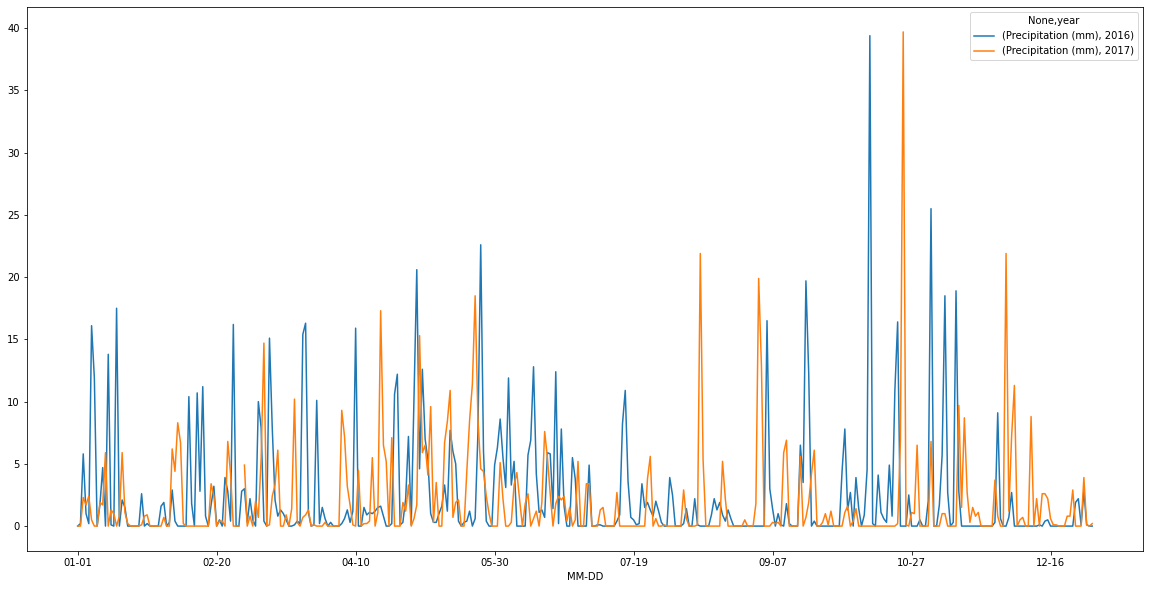

In [153]:
df = df_prec_2010_2020[df_prec_2010_2020["year"].isin([2016,2017])]
piv = pd.pivot_table(df, index=['MM-DD'],columns=['year'], values=['Precipitation (mm)'])
piv.plot(figsize=(20,10))

<AxesSubplot:xlabel='MM-DD'>

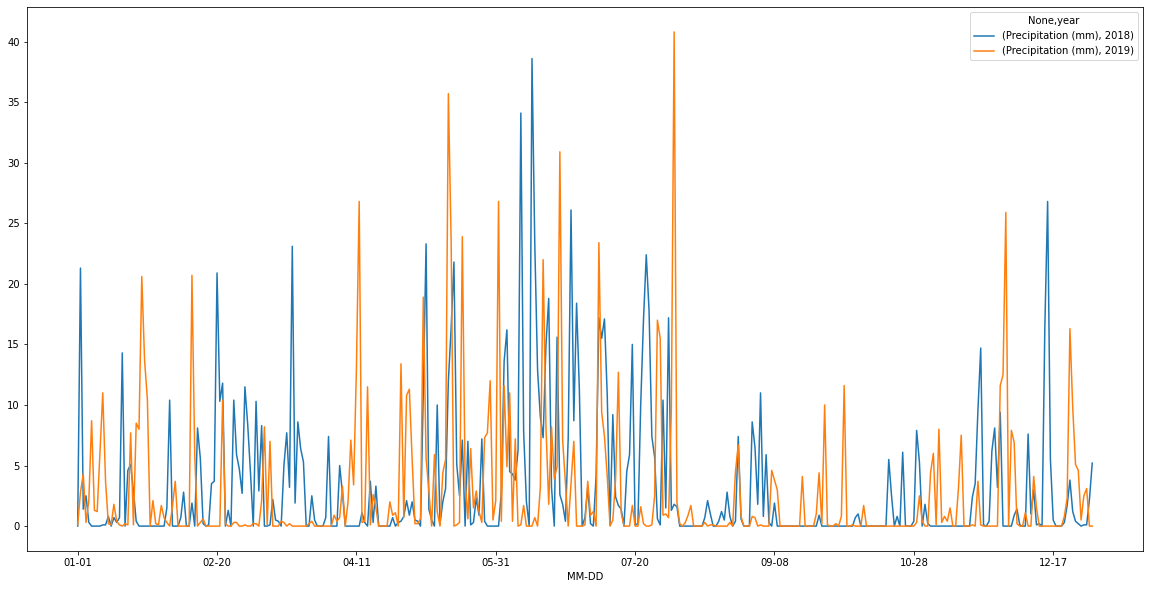

In [154]:
df = df_prec_2010_2020[df_prec_2010_2020["year"].isin([2018,2019])]
piv = pd.pivot_table(df, index=['MM-DD'],columns=['year'], values=['Precipitation (mm)'])
piv.plot(figsize=(20,10))

<AxesSubplot:xlabel='MM-DD'>

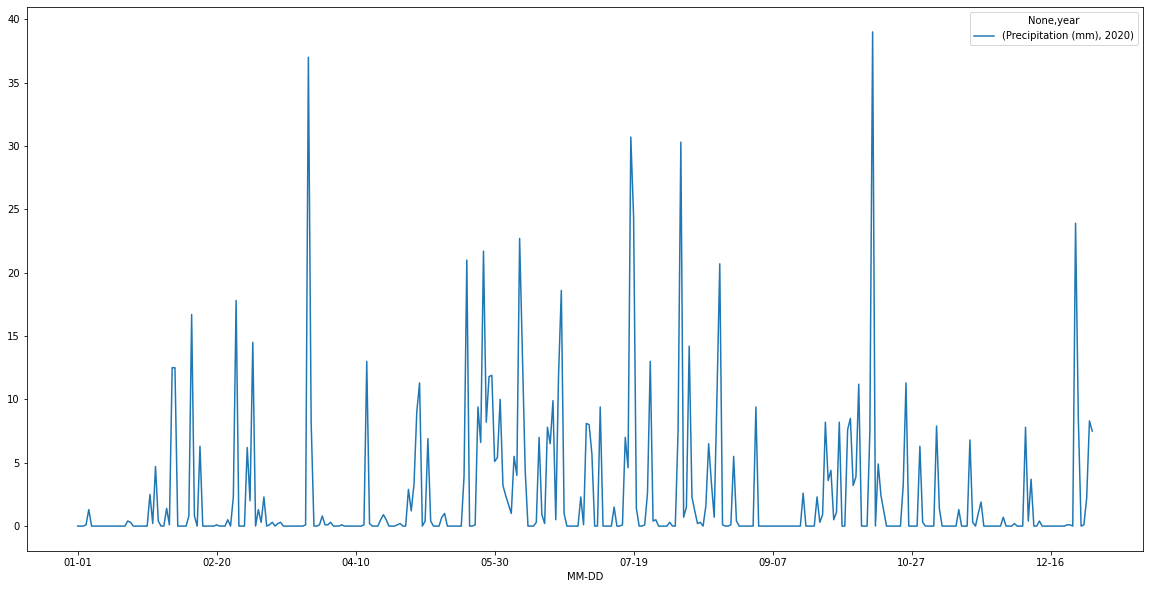

In [155]:
df = df_prec_2010_2020[df_prec_2010_2020["year"].isin([2020])]
piv = pd.pivot_table(df, index=['MM-DD'],columns=['year'], values=['Precipitation (mm)'])
piv.plot(figsize=(20,10))

### Below we can again observe the different patterns of precipitation according to the year

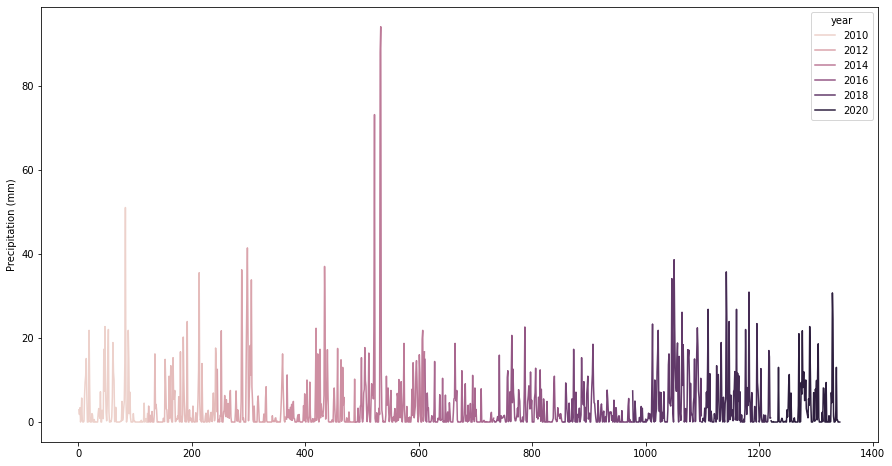

In [126]:
x = np.linspace(1, 1342, 1342)
df = df_prec_2010_2020[df_prec_2010_2020["month"].isin([4,5,6,7])]
plt.figure(figsize=(15,8))
ax = sns.lineplot(x=x, y='Precipitation (mm)', hue='year', data=df)

### Now working with a different file comprising flood occurrence

In [160]:
df_prec_2000_2018

,date,precipitation_mm,flood_occurrence,duration_days,cause
0,2000-04-05,11,Yes,20.0,"Snowmelt, Ice, Rain"
1,2000-04-06,13,NaN,NaN,NaN
2,2000-04-07,1,NaN,NaN,NaN
3,2000-04-08,0,NaN,NaN,NaN
4,2000-04-09,1,NaN,NaN,NaN
...,...,...,...,...,...
496,2018-04-03,1,NaN,NaN,NaN
497,2018-04-04,6,NaN,NaN,NaN
498,2018-04-05,2,NaN,NaN,NaN
499,2018-04-06,0,NaN,NaN,NaN


In [170]:
df_prec_2000_2018['date'] = pd.to_datetime(df_prec_2000_2018['date'])
df_prec_2000_2018['year'] = df_prec_2000_2018['date'].dt.year
df_prec_2000_2018['month'] = df_prec_2000_2018['date'].dt.month
df_prec_2000_2018['day'] = df_prec_2000_2018['date'].dt.day
df_prec_2000_2018['MM-DD'] = df_prec_2000_2018['date'].dt.strftime('%m-%d')


In [413]:
df_prec_2000_2018[df_prec_2000_2018['precipitation_mm']>=50]

,date,precipitation_mm,flood_occurrence,duration_days,cause
45,2002-09-21,56,Yes,17.0,Heavy rain
46,2002-09-22,137,NaN,NaN,NaN
47,2002-09-23,86,NaN,NaN,NaN
154,2005-02-22,55,NaN,NaN,NaN
386,2007-09-18,66,Yes,2.0,Heavy rain


In [407]:
df_prec_2000_2018.iloc[350:400,:]

,date,precipitation_mm,flood_occurrence,duration_days,cause
350,2006-05-03,1,NaN,NaN,NaN
351,2006-05-04,0,NaN,NaN,NaN
352,2006-05-05,1,NaN,NaN,NaN
353,2006-05-06,5,NaN,NaN,NaN
354,2006-05-07,3,NaN,NaN,NaN
355,2006-05-08,3,NaN,NaN,NaN
356,2006-05-09,7,NaN,NaN,NaN
357,2006-05-10,10,NaN,NaN,NaN
358,2006-05-11,9,NaN,NaN,NaN
359,2006-05-12,1,NaN,NaN,NaN


### When plotting, it can be seen that a lot of data is missing and that the precipitations values
### are not similar to the file above (belgrade_precipitation_2010_2020.csv).

<AxesSubplot:xlabel='MM-DD'>

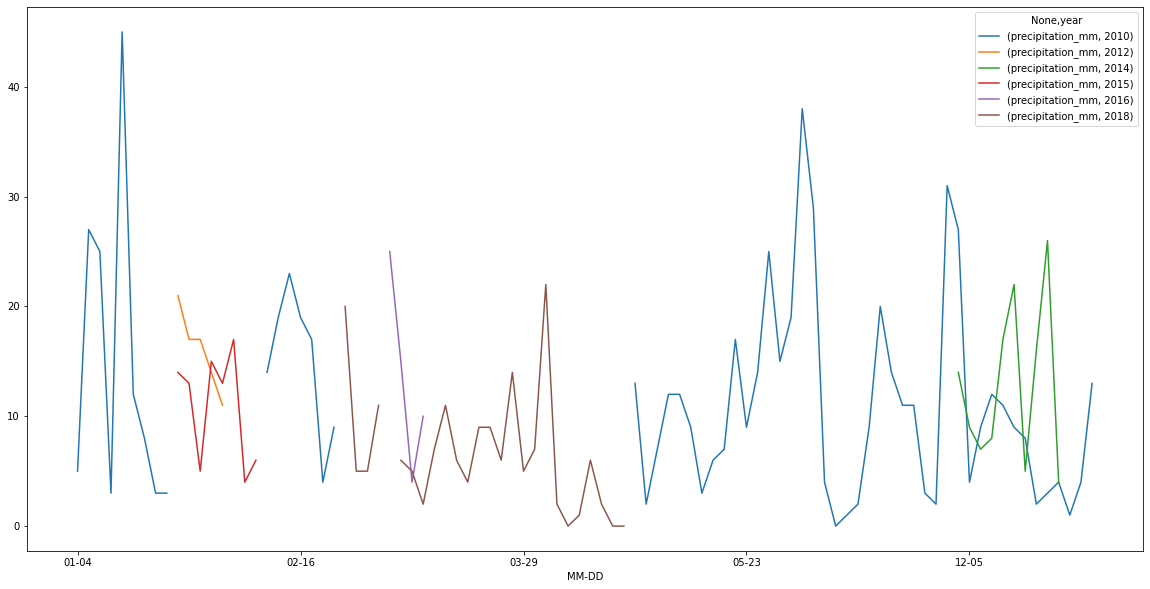

In [284]:
df_prec_2000_2018_modified = df_prec_2000_2018[df_prec_2000_2018['year'].isin([2010,
                                            2011,2012,2013,2014,2015,2016,2017,2018])]
#df_prec_2000_2018_modified = df_prec_2000_2018[df_prec_2000_2018['year'].isin([2014])]
        
piv = pd.pivot_table(df_prec_2000_2018_modified, index=['MM-DD'],columns=['year'], values=['precipitation_mm'])
piv.plot(figsize=(20,10))

In [409]:
df_prec_2000_2018.describe()

,precipitation_mm,duration_days
count,501.000000,35.000000
mean,9.700599,15.457143
std,11.337644,12.777146
min,0.000000,2.000000
25%,3.000000,7.000000
50%,7.000000,11.000000
75%,14.000000,18.000000
max,137.000000,47.000000


### On the plot below, it can be seen that flood does not systematically correspond to heavy precipitation.

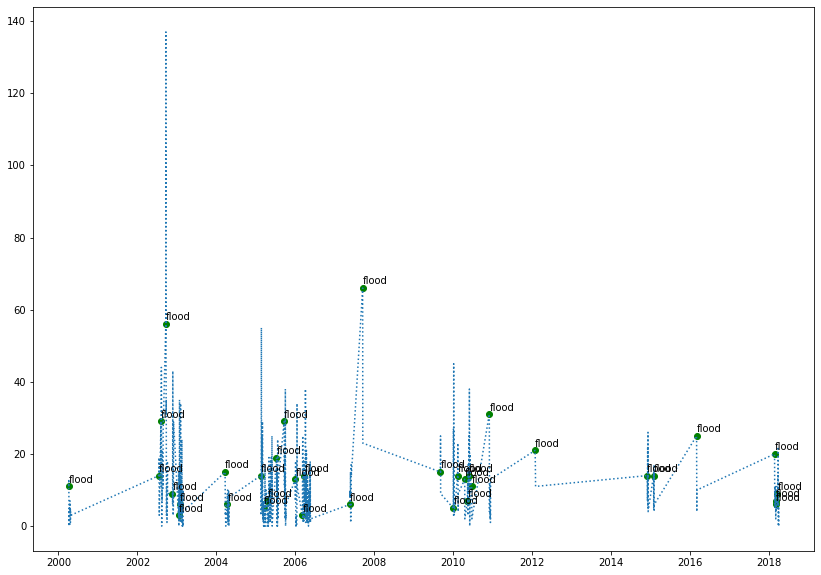

In [282]:
list_columns = ['date','precipitation_mm','flood_occurrence']
x, y, s = [df_prec_2000_2018[col] for col in list_columns]
#x, y, s

fig, ax = plt.subplots(figsize=(14,10))
#ax.plot(x,y,'s')
ax.plot(x,y,linestyle = ':')

ax.scatter(x[s=='Yes'], y[s=='Yes'], c='g')
for i,j,k in zip(x,y,s):
    if k =='Yes':
        ax.annotate('flood', xy=(i,j), xytext=(i,j + 1))


In [185]:
df_floods = df_prec_2000_2018_modified[(df_prec_2000_2018_modified['flood_occurrence']=='Yes') & (df_prec_2000_2018_modified['cause']== 'Heavy rain')]

In [191]:
df_floods

,Date,precipitation_mm,flood_occurrence,duration_days,cause,year,month,day,MM-DD
391,2010-01-04,5,Yes,9.0,Heavy rain,2010,1,4,01-04
400,2010-02-13,14,Yes,7.0,Heavy rain,2010,2,13,02-13
407,2010-04-20,13,Yes,2.0,Heavy rain,2010,4,20,04-20
409,2010-05-15,7,Yes,9.0,Heavy rain,2010,5,15,05-15
418,2010-05-29,14,Yes,13.0,Heavy rain,2010,5,29,05-29
431,2010-06-22,11,Yes,46.0,Heavy rain,2010,6,22,06-22
435,2010-12-03,31,Yes,14.0,Heavy rain,2010,12,3,12-03
454,2014-12-04,14,Yes,10.0,Heavy rain,2014,12,4,12-04
464,2015-02-01,14,Yes,8.0,Heavy rain,2015,2,1,02-01
472,2016-03-06,25,Yes,4.0,Heavy rain,2016,3,6,03-06


In [193]:
df_floods.rename(columns={'date':'Date'})

,Date,precipitation_mm,flood_occurrence,duration_days,cause,year,month,day,MM-DD
391,2010-01-04,5,Yes,9.0,Heavy rain,2010,1,4,01-04
400,2010-02-13,14,Yes,7.0,Heavy rain,2010,2,13,02-13
407,2010-04-20,13,Yes,2.0,Heavy rain,2010,4,20,04-20
409,2010-05-15,7,Yes,9.0,Heavy rain,2010,5,15,05-15
418,2010-05-29,14,Yes,13.0,Heavy rain,2010,5,29,05-29
431,2010-06-22,11,Yes,46.0,Heavy rain,2010,6,22,06-22
435,2010-12-03,31,Yes,14.0,Heavy rain,2010,12,3,12-03
454,2014-12-04,14,Yes,10.0,Heavy rain,2014,12,4,12-04
464,2015-02-01,14,Yes,8.0,Heavy rain,2015,2,1,02-01
472,2016-03-06,25,Yes,4.0,Heavy rain,2016,3,6,03-06


In [195]:
len(df_floods)

12

### The datasets belgrade_precipitation_2010_2020.csv and 
### daily_precipitation_flood_occurence_SERBIA_2000_to_2018.csv
### are merged in order to see where the flood occurrence overlays the precipitation


In [294]:
df1 = df_prec_2010_2020.copy()
df_two_dataframes = pd.merge(df1, df_floods, on="Date", how="left")
df_two_dataframes.iloc[1850:1900,:]

,Date,Precipitation (mm),year_x,month_x,day_x,MM-DD_x,precipitation_mm,flood_occurrence,duration_days,cause,year_y,month_y,day_y,MM-DD_y
1850,2015-01-25,2.5,2015,1,25,01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1851,2015-01-26,3.1,2015,1,26,01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,2015-01-27,1.4,2015,1,27,01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853,2015-01-28,2.0,2015,1,28,01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1854,2015-01-29,0.0,2015,1,29,01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1855,2015-01-30,5.3,2015,1,30,01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1856,2015-01-31,0.0,2015,1,31,01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1857,2015-02-01,8.9,2015,2,1,02-01,14.0,Yes,8.0,Heavy rain,2015.0,2.0,1.0,02-01
1858,2015-02-02,1.4,2015,2,2,02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1859,2015-02-03,0.0,2015,2,3,02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
df_two_dataframes.rename(columns={'Precipitation (mm)':'Precipitation(mm)'})

,Date,Precipitation(mm),year_x,month_x,day_x,MM-DD_x,precipitation_mm,flood_occurrence,duration_days,cause,year_y,month_y,day_y,MM-DD_y
0,2010-01-01,10.5,2010,1,1,01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,17.4,2010,1,2,01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,11.0,2010,1,3,01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,0.0,2010,1,4,01-04,5.0,Yes,9.0,Heavy rain,2010.0,1.0,4.0,01-04
4,2010-01-05,11.6,2010,1,5,01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2020-12-27,0.0,2020,12,27,12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,2020-12-28,0.1,2020,12,28,12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,2020-12-29,2.2,2020,12,29,12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4016,2020-12-30,8.3,2020,12,30,12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### It can be noted that the flood occurrence does not necessarily correspond to heavy rain.

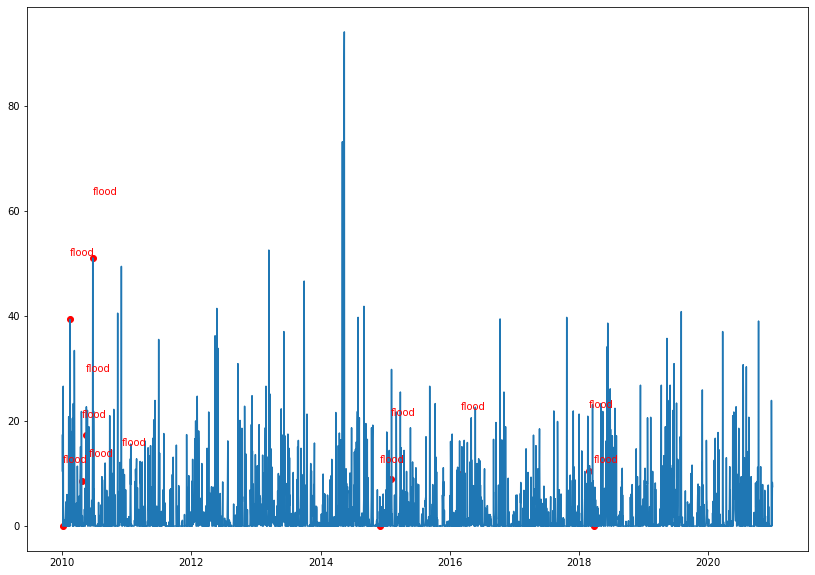

In [288]:
list_columns = ['Date','Precipitation (mm)','flood_occurrence']
x, y, s = [df_two_dataframes[col] for col in list_columns]
#x, y, s

fig, ax = plt.subplots(figsize=(14,10))
ax.plot(x,y)

ax.scatter(x[s=='Yes'], y[s=='Yes'], c='r')
for i,j,k in zip(x,y,s):
    if k =='Yes':
        #print(i,j)
        ax.annotate('flood', xy=(i,j), xytext=(i,j + 12),color='r')



### Here in addition to the flood occurrence, the water level is annotated on the precipitation graph.

In [298]:
water_level_Belgrade

,date,waterlevel
0,2000/01/01,461.0
1,2000/01/02,474.0
2,2000/01/03,478.0
3,2000/01/04,474.0
4,2000/01/05,464.0
...,...,...
8396,2022-12-27,358.0
8397,2022-12-28,356.0
8398,2022-12-29,362.0
8399,2022-12-30,370.0


In [328]:
water_level_Belgrade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        8401 non-null   datetime64[ns]
 1   waterlevel  8401 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 131.4 KB


In [344]:
df1 = df_prec_2010_2020.copy()
df1.rename(columns = {'Date':'date'},inplace=True)
#df1
df_two_dataframes_water_level = pd.merge(df1, water_level_Belgrade, on="date", how="left")
df_two_dataframes_water_level.iloc[1580:1620,:]

,date,Precipitation (mm),year,month,day,MM-DD,waterlevel
1580,2014-04-30,6.4,2014,4,30,04-30,350.0
1581,2014-05-01,8.6,2014,5,1,05-01,352.0
1582,2014-05-02,5.5,2014,5,2,05-02,358.0
1583,2014-05-03,23.0,2014,5,3,05-03,364.0
1584,2014-05-04,73.1,2014,5,4,05-04,373.0
1585,2014-05-05,0.9,2014,5,5,05-05,386.0
1586,2014-05-06,0.0,2014,5,6,05-06,405.0
1587,2014-05-07,0.1,2014,5,7,05-07,416.0
1588,2014-05-08,2.2,2014,5,8,05-08,419.0
1589,2014-05-09,0.0,2014,5,9,05-09,419.0


In [396]:
df_two_dataframes_water_level.describe()

,Precipitation (mm),year,month,day,waterlevel
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000
mean,2.751543,2015.000747,6.522648,15.730463,284.753858
std,5.920144,3.162868,3.449210,8.801536,98.757597
min,0.000000,2010.000000,1.000000,1.000000,136.000000
25%,0.000000,2012.000000,4.000000,8.000000,206.000000
50%,0.200000,2015.000000,7.000000,16.000000,263.000000
75%,2.800000,2018.000000,10.000000,23.000000,341.750000
max,94.000000,2020.000000,12.000000,31.000000,650.000000


In [ ]:
df1 = df_prec_2010_2020.copy()
df1.rename(columns = {'Date':'date'},inplace=True)
#df1
df_two_dataframes_water_level = pd.merge(df1, water_level_Belgrade, on="date", how="left")
df_two_dataframes_water_level.iloc[1580:1620,:]

In [370]:
df_floods.rename(columns = {'Date':'date'},inplace=True)
df_three_dataframes = pd.merge(df_two_dataframes_water_level, df_floods, on="date", how="left")
df_three_dataframes

,date,Precipitation (mm),year_x,month_x,day_x,MM-DD_x,waterlevel,precipitation_mm,flood_occurrence,duration_days,cause,year_y,month_y,day_y,MM-DD_y
0,2010-01-01,10.5,2010,1,1,01-01,447.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,17.4,2010,1,2,01-02,452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,11.0,2010,1,3,01-03,454.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,0.0,2010,1,4,01-04,455.0,5.0,Yes,9.0,Heavy rain,2010.0,1.0,4.0,01-04
4,2010-01-05,11.6,2010,1,5,01-05,459.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2020-12-27,0.0,2020,12,27,12-27,272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,2020-12-28,0.1,2020,12,28,12-28,277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,2020-12-29,2.2,2020,12,29,12-29,283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4016,2020-12-30,8.3,2020,12,30,12-30,289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### When overlaying water level and flood occurrence on precipitations, it can again be observed on the
### graph that there is not always coincidence with heavy rain; namely for the important floods in 2014
### and 2020.


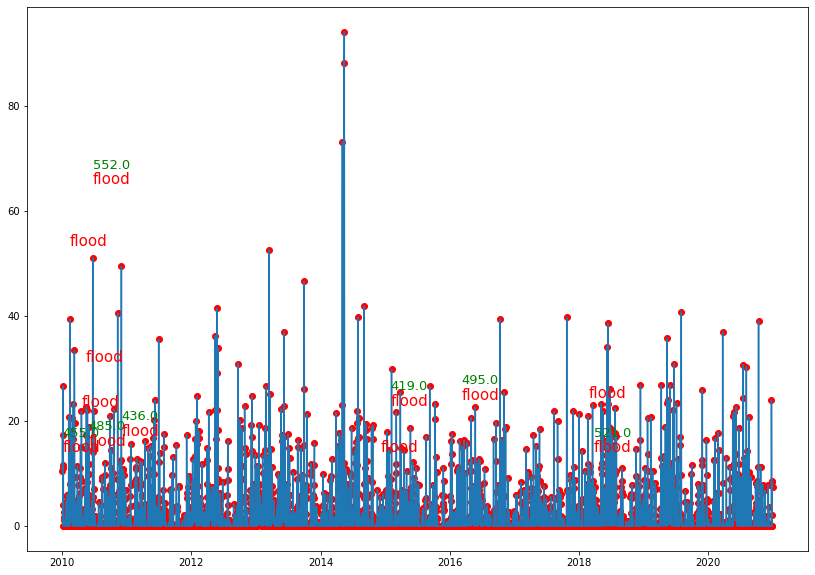

In [397]:
list_columns = ['date','Precipitation (mm)','waterlevel','flood_occurrence']
x, y, s, f = [df_three_dataframes[col] for col in list_columns]
#x, y, s

fig, ax = plt.subplots(figsize=(14,10))
ax.plot(x,y)

ax.scatter(x, y, c='r')
for i,j,k,l in zip(x,y,s,f):
    #if (k >= 400):
    if(l=='Yes'):
        ax.annotate('flood', xy=(i,j), xytext=(i,j + 14),color='r',fontsize=15)
        if (k>= 400):
            ax.annotate( k, xy=(i,j), xytext=(i,j + 17),color='g',fontsize=13)
